# DTSA 5509 Machine Learning - Supervised
## Final Project

Where I left off: 

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
#import altair as alt
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report, accuracy_score

import projectfunctions as cf

from sklearn.feature_selection import RFECV

In [2]:
# load data
data = pd.read_csv('loan_approval_dataset.csv')

# view first few lines
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Exploratory Data Analysis:

In [3]:
data.describe(include = 'all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#### Some observations about the data:
* no columns are missing data
* loan_id will be dropped, as there's no need for 2 indices
* looking at the column of column names, there appears to be a leading space in the column names. These will need to be stripped out in preprocessing.
* columns 4:11 are numerical and will need to be scaled in preprocessing.
* no_of_dependents is a numerical column, but I personally feel that the number of dependents a person has is a personal issue and should not be treated in a ranked order. I'll convert this column to categorical, just for funsies.


In [ ]:
cleaning_list = []

cleaning_list.extend(['drop loan id',
                      'strip out leading space in the column names',
                      'scale numerical: cols 4:11',
                      'dependents to category'])

Now to have a look at the object columns and the unique values of their contents:

In [5]:
obj_cols = data.select_dtypes(include = 'object').columns

for column in obj_cols:
    unique_values = data[column].unique()
    print(f'''Unique values in column '{column}': {unique_values}''')

Unique values in column ' education': [' Graduate' ' Not Graduate']
Unique values in column ' self_employed': [' No' ' Yes']
Unique values in column ' loan_status': [' Approved' ' Rejected']


#### Some observations about the data:
* I can see there are leading spaces in the string values. These will have to be stripped out in preprocessing.
* There are only 2 values each for education and self-employed. I'll convert these columns to binary.
* Loan status is the target column with only 2 values, meaning this is a binary classification problem.

In [ ]:
cleaning_list.extend(['strip out leading space in the string values', 
                      'binary: edu and self-emp'])

In [6]:
# remove spaces
data = cf.strip_spaces(data)

### Time to split the data into training and testing sets, and separate the data into X and y variables

In [7]:
# split data
train_df, test_df = train_test_split(data, test_size = 0.20, random_state = 2024)

In [8]:
# separate X and y variables
X_train = train_df.drop(columns = 'loan_status')
y_train = train_df['loan_status']
X_test = test_df.drop(columns = 'loan_status')
y_test = test_df['loan_status']

#### Loan status is the target
Lets take a look at how the data is distributed:

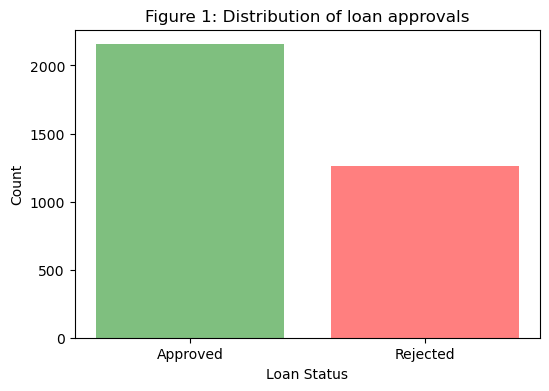

In [9]:
sorted_aprov_counts = train_df['loan_status'].value_counts().sort_values(ascending=False)

colors = ['green' if loan_status == 'Approved' else 'red' for loan_status in sorted_aprov_counts.index]

plt.figure(figsize=(6, 4))
plt.bar(sorted_aprov_counts.index, sorted_aprov_counts.values, color=colors, alpha=0.5)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Figure 1: Distribution of loan approvals')
plt.show()

Here we have a class imbalance. Imbalanced target data could cause the model to be biased towards the larger proportion of data, in this case, it is Approved status. Some strategies to address this class imbalance are ensembling methods such as AdaBoost, gradient boosting, or balanced random forest classifier.

Other methods may be Changing Performance Metrics:

Instead of accuracy, use metrics like precision, recall, F1-score, or ROC-AUC that are more informative for imbalanced datasets.

### Distribution of the categorical variables

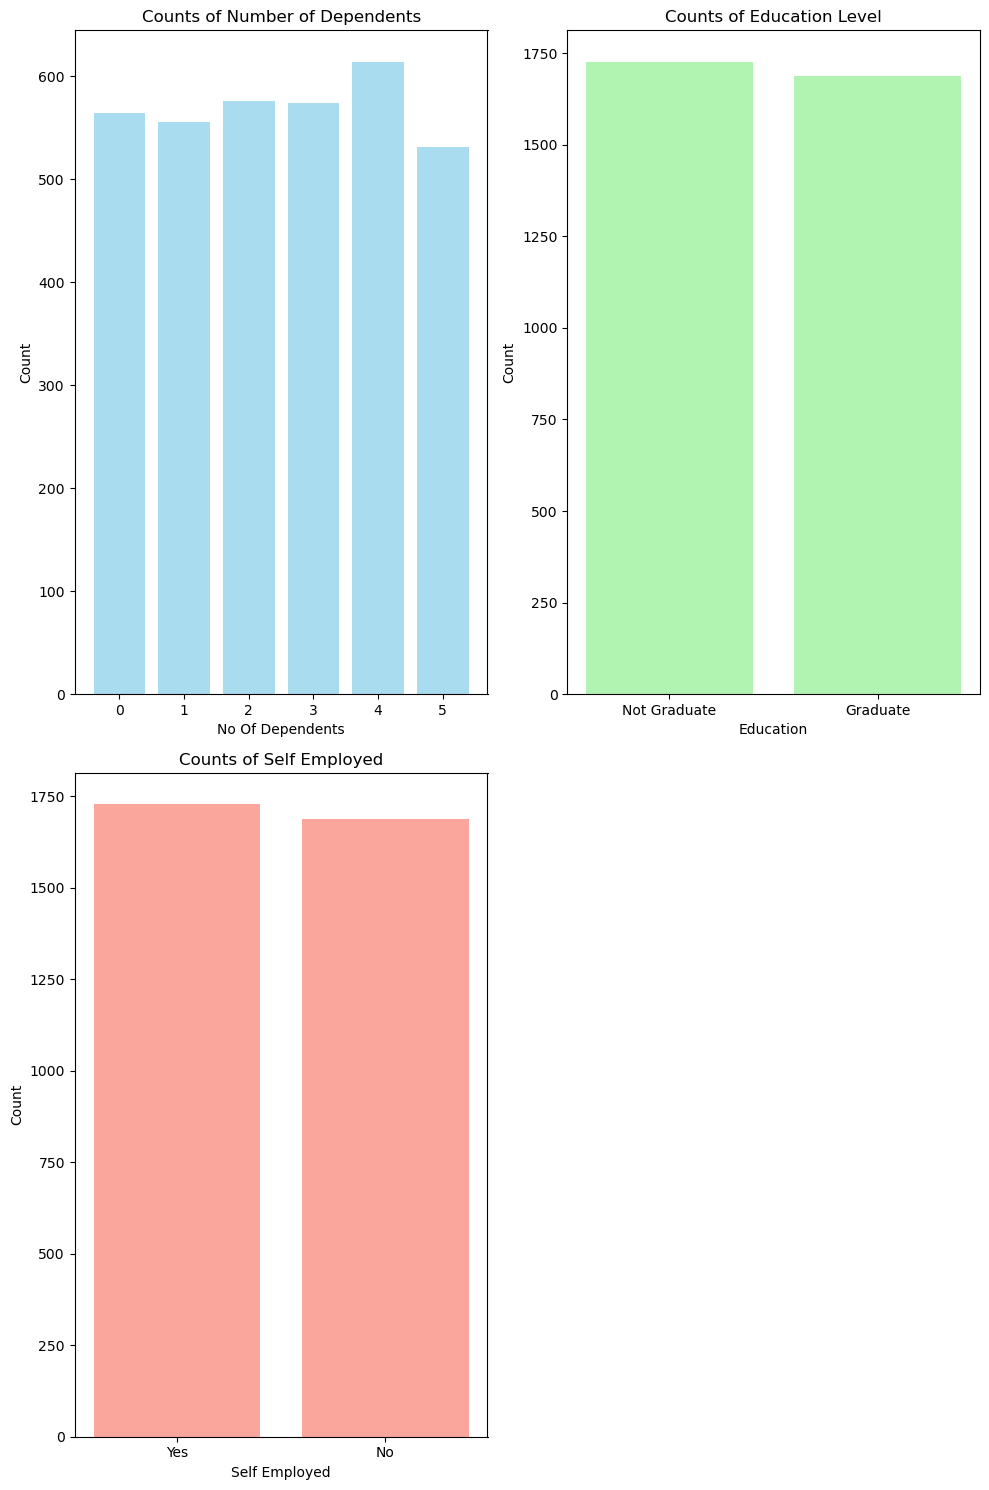

In [10]:
import matplotlib.pyplot as plt

# Columns to plot
columns = ['no_of_dependents', 'education', 'self_employed']
colors = ['skyblue', 'lightgreen', 'salmon']
titles = ['Counts of Number of Dependents', 'Counts of Education Level', 'Counts of Self Employed']

# Create a figure and axis objects with a 3 x 1 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 15))

axs = axs.flatten()

# Loop through columns and plot
for i, col in enumerate(columns):
    counts = train_df[col].value_counts()
    axs[i].bar(counts.index, counts.values, color=colors[i], alpha=0.7)
    axs[i].set_xlabel(col.replace('_', ' ').title())
    axs[i].set_ylabel('Count')
    axs[i].set_title(titles[i])
    
axs[3].axis('off') 

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


There doesn't seem to be larger differences here. Their use will be determined later on based on... information gain? Impurity?

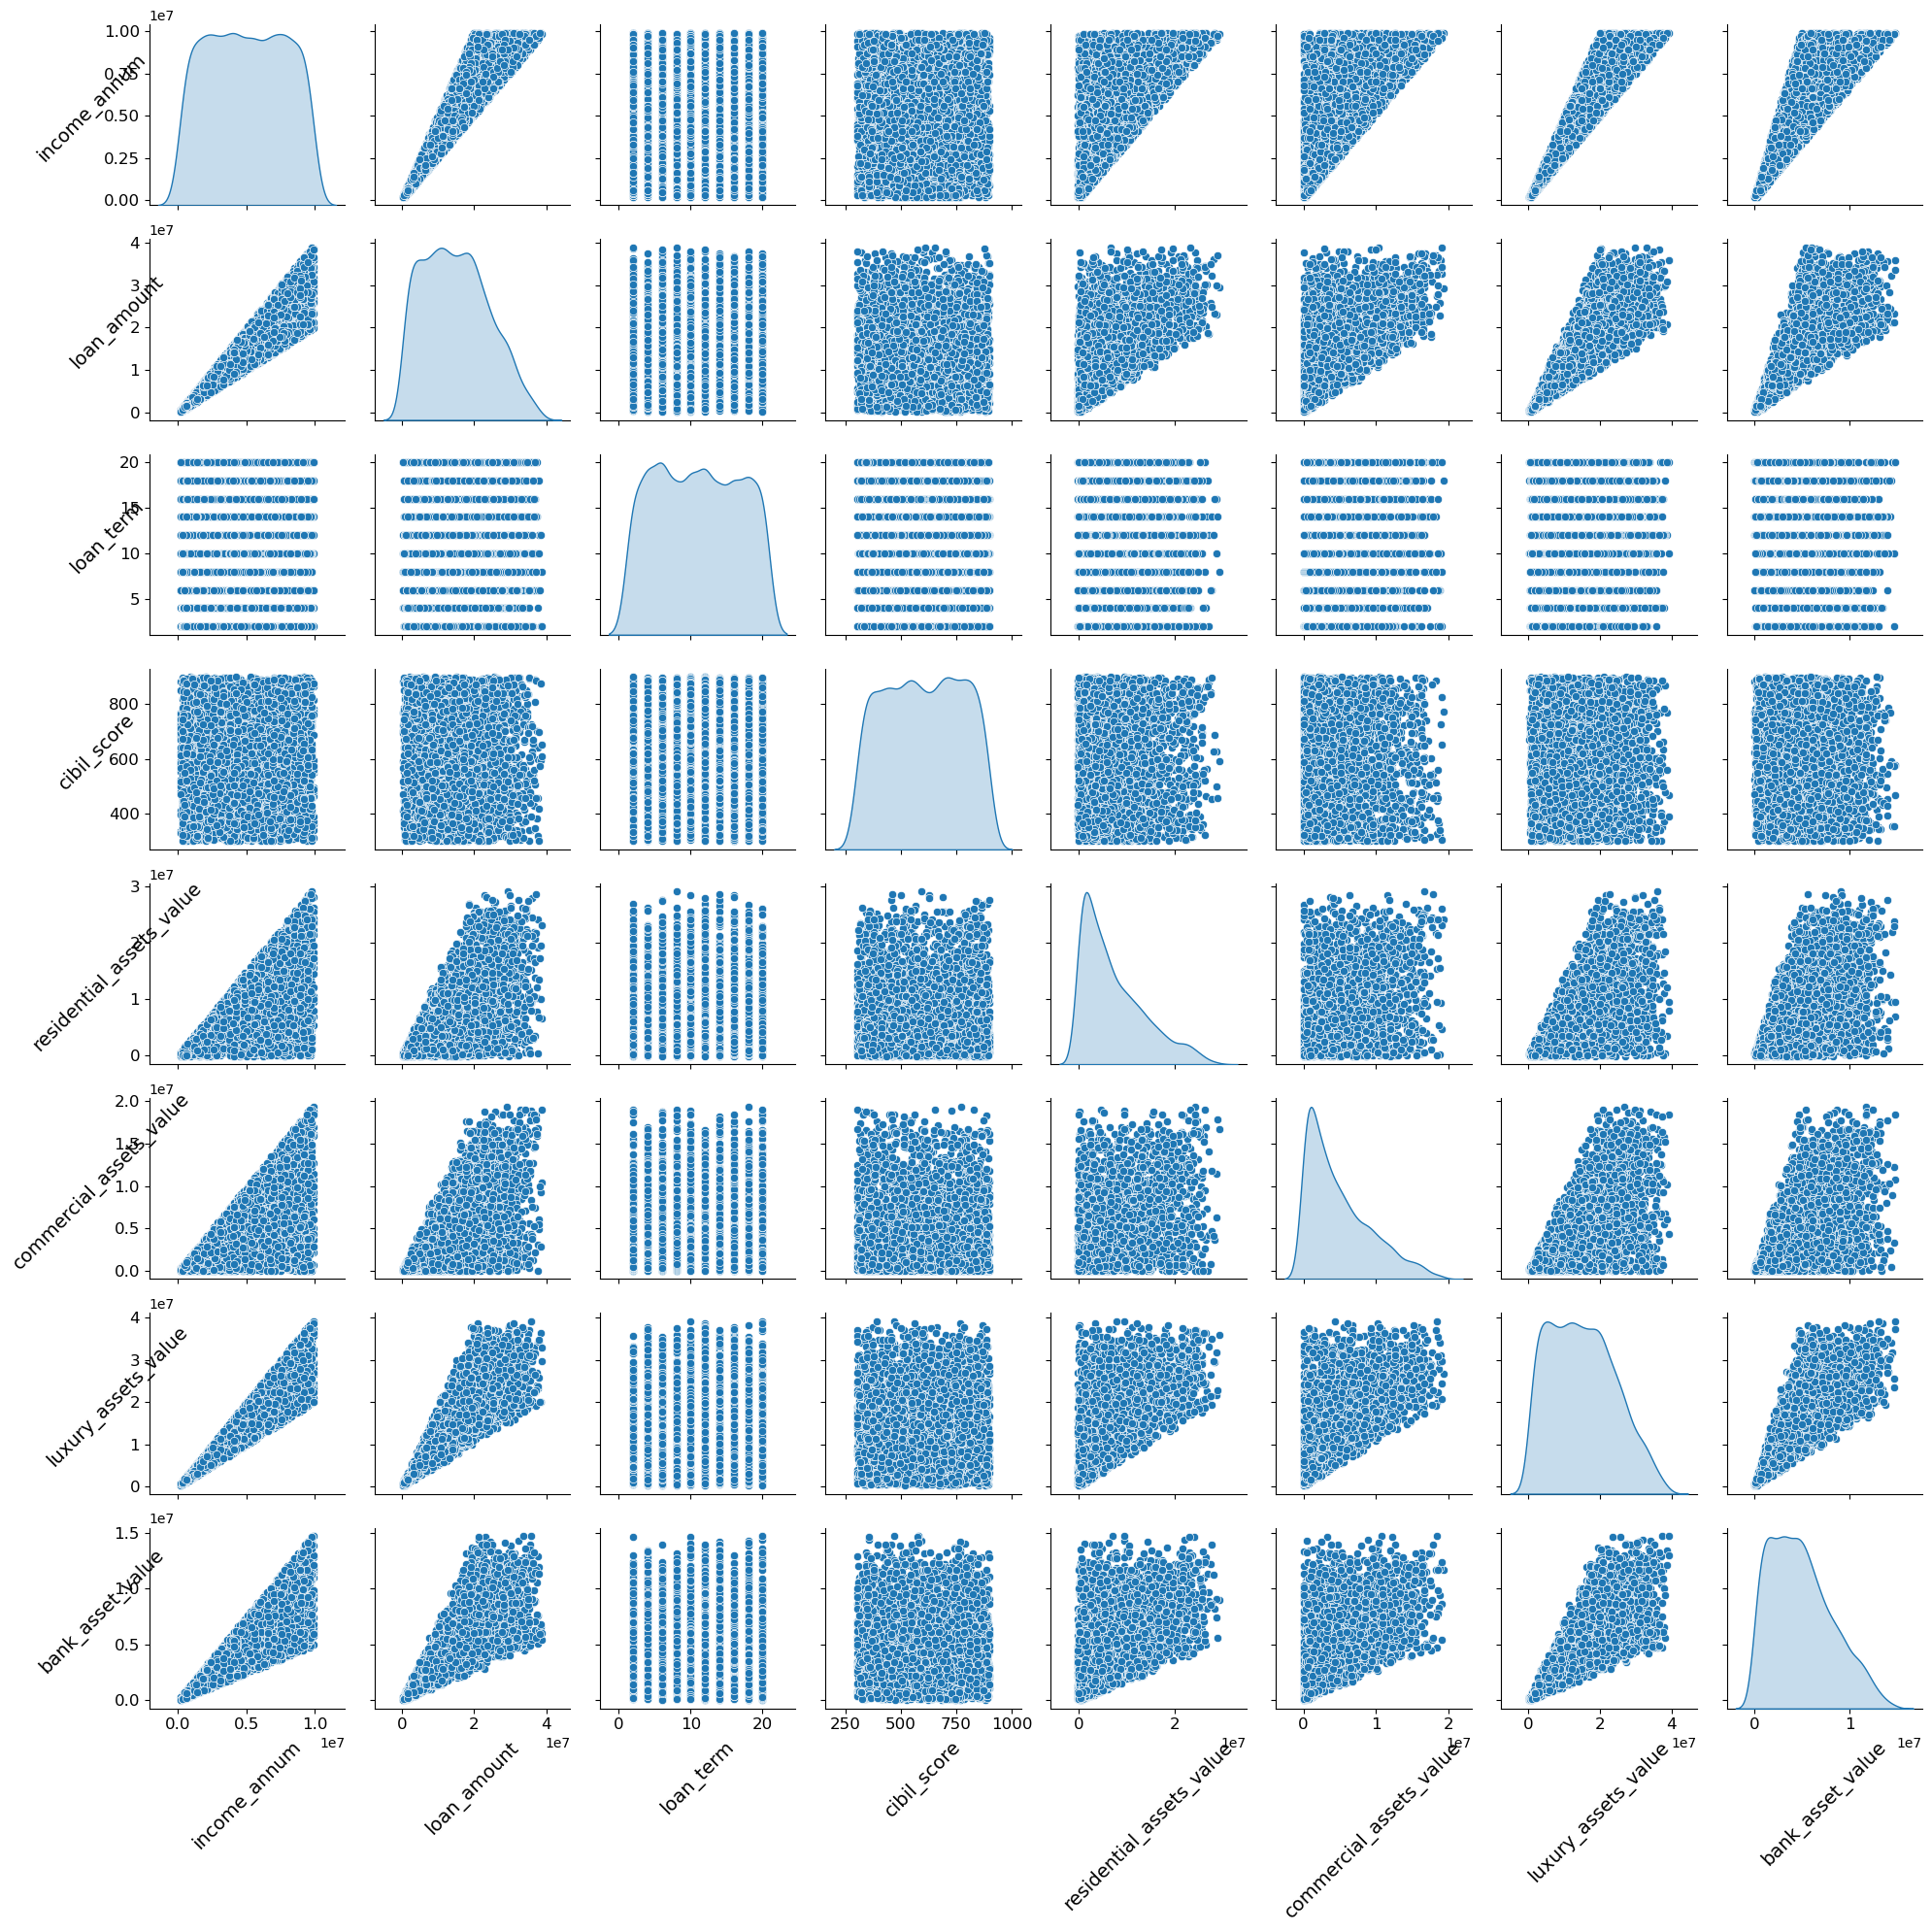

In [11]:
# fix the y axis labels

numeric_feats = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                 'bank_asset_value']

numeric_train_df = train_df[numeric_feats]

pair_plot = sns.pairplot(numeric_train_df, diag_kind = 'kde')

for ax in pair_plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(45)
    ax.yaxis.label.set_position((-20, 0.5))
 
    
plt.tight_layout()

plt.show()

### Baseline model: Dummy Classifier

In [12]:
dummy_model = DummyClassifier(strategy = 'most_frequent')
dummy_model.fit(X_train, y_train)
dummy_cv = cross_validate(dummy_model, X_train, y_train, cv = 5, return_train_score = True)

dummy_scores = pd.DataFrame(dummy_cv)
dummy_scores

,fit_time,score_time,test_score,train_score
0,0.002082,0.003001,0.63104,0.63104
1,0.002997,0.001510,0.63104,0.63104
2,0.001996,0.001008,0.63104,0.63104
3,0.002000,0.000999,0.63104,0.63104
4,0.001000,0.002003,0.63104,0.63104


### Model Selection

The first step in building a model is to specify which columns belong to which type of feature. 

In [13]:
#categorize the features

drop_feats = ['loan_id']

categorical_feats = ['no_of_dependents']

numeric_feats = ['income_annum', 'loan_amount', 
                 'loan_term', 'cibil_score', 
                 'residential_assets_value', 
                 'commercial_assets_value', 
                 'luxury_assets_value',
                 'bank_asset_value']

binary_feats = ['education', 'self_employed'] 

#### Creating data transformers

The code cell below specifies how each type of features will be treated. Because I like to handle the data as little as possible before doing a train_test_split, I need a way to consistently process both the training and testing data after a split: SkLearn's Pipeline and Preprocessing modules are extremely convenient for this. While there are no missing values within my dataset, imputing missing values has been left in so that this framework may be again used on a broader range of datasets.

In [14]:
# specify transformers

categorical_transformer = make_pipeline(SimpleImputer(strategy = 'most_frequent'),
                                       OneHotEncoder(dtype = int, 
                                                     handle_unknown = 'ignore'))
                                        
numeric_transformer = make_pipeline(SimpleImputer(strategy = 'median'),
                                   (StandardScaler()))
 
                                  
binary_transformer = make_pipeline(SimpleImputer(strategy = 'most_frequent'), 
                                                 OneHotEncoder(drop = 'if_binary',
                                                 dtype = int,
                                                 sparse_output = False))



#### Preprocessing data:

In [18]:
#preprocessor = make_pipeline(make_column_transformer(
#                                       (categorical_transformer, categorical_feats),
#                                       (numeric_transformer, numeric_feats),
#                                       (binary_transformer, binary_feats),
                                       #(ordinal_transformer, ordinal_feats),
                                       #(txt_transformer, txt_feats),
#                                       ('drop', drop_feats),
#                                       remainder = 'passthrough'))

#### Trying out different models:

In [ ]:
# ignore future warnings about sparse renamed to sparse_output
#warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.preprocessing._encoders')


results_dict = {'Dummy': {'mean_train_accuracy': round(dummy_scores["train_score"].mean(),4),
                          'mean_validation_accuracy': round(dummy_scores["test_score"].mean(),4),
                          'mean_fit_time (s)': round(dummy_scores["fit_time"].mean(),4),
                          'mean_score_time (s)': round(dummy_scores["score_time"].mean(),4)}}


models = {     
    'RBF SVM': SVC(random_state = 2024),
    'kNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state = 2024)    
        
    }

for model_name, model in models.items():
        
    model_selection_pipe = make_pipeline(preprocessor, model)
    
    scores = cross_validate(model_selection_pipe, X_train, y_train, cv=5, return_train_score=True)
    
    model_results = {
        'mean_train_accuracy': round(scores["train_score"].mean(), 4),
        'mean_validation_accuracy': round(scores["test_score"].mean(), 4),
        'mean_fit_time (s)': round(scores["fit_time"].mean(), 4),
        'mean_score_time (s)': round(scores["score_time"].mean(), 4)
    }
    
    results_dict[model_name] = model_results
results_df = pd.DataFrame(results_dict).T
results_df

### Feature Selection

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_feats),
        ('num', numeric_transformer, numeric_feats),
        ('bin', binary_transformer, binary_feats)
    ],
    remainder='passthrough'
)

In [23]:
print("Number of feature names:", len(feature_names))
print("Number of feature importances:", len(importances))


Number of feature names: 17
Number of feature importances: 16


In [24]:
print("Feature names:", feature_names)
print("Feature importances:", importances)

Feature names: ['no_of_dependents_0', 'no_of_dependents_1', 'no_of_dependents_2', 'no_of_dependents_3', 'no_of_dependents_4', 'no_of_dependents_5', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'education_Not Graduate', 'self_employed_Yes', 0]
Feature importances: [0.00167003 0.00208825 0.00155196 0.00296259 0.00197151 0.00187306
 0.01851532 0.02687646 0.06272011 0.80320013 0.016943   0.01858504
 0.01947922 0.01637297 0.00265999 0.00253035]


In [22]:
# find out how important the features are for the Random Forest model:

model = RandomForestClassifier(random_state=2024)

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', model)
])

pipeline.fit(X_train, y_train)

# Define the feature names extraction function
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, columns in column_transformer.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            transformer_names = transformer.get_feature_names_out()
            feature_names.extend(transformer_names)
        else:
            feature_names.extend(columns)
    return feature_names

# Get the feature names from the preprocessor
feature_names = get_feature_names(pipeline.named_steps['preprocessor'])

# Check if feature_names length matches the number of importances
assert len(feature_names) == len(importances), "Feature names and importances length mismatch"

importances = pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for easier visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

AssertionError: Feature names and importances length mismatch

### References

* The code structure for my preprocessor and pipeline comes from a course I had previous taken at the University of British Columbia, Extended Learning: FS031 Intro to Machine Learning. 
* Not going to lie, I used OpenAI to assist me with this project - mainly for the plotting and debugging. Nothing was copied and pasted blindly, and I use it as a learning tool (it also steered my wrong a few times lol).